# Used Car Price Prediction | Data Exploration and Preprocessing

This notebook contains the full data exploration and preprocessing pipeline for the Car Price Prediction Challenge. We do the following:
- Perform visual and statistical exploration
- Clean and transform the data
- Engineer new features
- Prepare datasets tailored for different model types (log-transformed vs raw target)

The cleaned datasets will be used for model training and final predictions.

We import the necessary packages for data exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [4]:
import pandas as pd

# Adjust path if needed for your OS and file structure
test_df = pd.read_csv('~/Downloads/test.csv')  # Or full path like '/Users/yourname/Downloads/test.csv'
print(f"Rows (excluding header): {len(test_df)}")  # Should be 15896

Rows (excluding header): 12717


We load the training dataset for exploration and modeling.

In [2]:
df = pd.read_csv('../data/train.csv')

We inspect the first few rows to get a sense of the data structure and content.

In [3]:
# Preview the first few rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,ID
0,A1,2016,11995,Manual,22606,Petrol,30,57.6,1.4,Audi,22020
1,A4,2013,6000,Manual,129680,Diesel,30,64.2,2.0,Audi,35851
2,Golf,2016,13920,Manual,47576,Diesel,20,67.3,2.0,VW,20037
3,Golf,2015,10600,Manual,30983,Petrol,30,53.3,1.4,VW,33065
4,Golf,2019,21699,Semi-Auto,5229,Petrol,145,43.5,1.5,VW,34154


We check for missing data and assess the column data types.

In [4]:
# Overview of data types and non-null counts
df.info()

# Count missing values per column
df.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24686 entries, 0 to 24685
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         24686 non-null  object 
 1   year          24686 non-null  int64  
 2   price         24686 non-null  int64  
 3   transmission  24686 non-null  object 
 4   mileage       24686 non-null  int64  
 5   fuelType      24686 non-null  object 
 6   tax           24686 non-null  int64  
 7   mpg           24686 non-null  float64
 8   engineSize    24686 non-null  float64
 9   brand         24686 non-null  object 
 10  ID            24686 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 2.1+ MB


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
ID              0
dtype: int64

Key statistics (mean, std, percentiles) for numeric variables.

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,ID
count,24686.000000,24686.000000,24686.000000,24686.000000,24686.000000,24686.000000,24686.000000
mean,2017.230900,20780.246618,23305.655797,120.716601,54.398145,1.874532,23291.239609
std,2.086249,9801.517381,22310.025605,60.505073,14.722138,0.538128,13419.012649
min,1996.000000,650.000000,1.000000,0.000000,0.300000,0.000000,0.000000
25%,2016.000000,13995.000000,5932.500000,125.000000,45.600000,1.500000,11697.250000
50%,2017.000000,19248.000000,16921.500000,145.000000,53.300000,2.000000,23320.000000
75%,2019.000000,25495.000000,33913.750000,145.000000,61.400000,2.000000,34782.750000
max,2020.000000,149948.000000,214000.000000,580.000000,217.300000,6.200000,46752.000000


A histogram with KDE to observe price skewness and identify common value ranges.

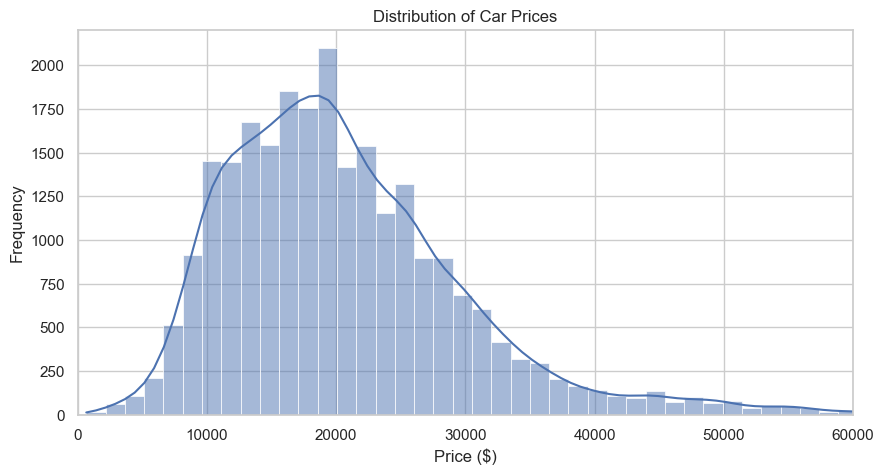

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.xlim(0, 60000)  # Adjust upper bound as needed
plt.show()

Boxplot or prices: shows presence of outliers and distribution spread. Important for decisions like winsorization.

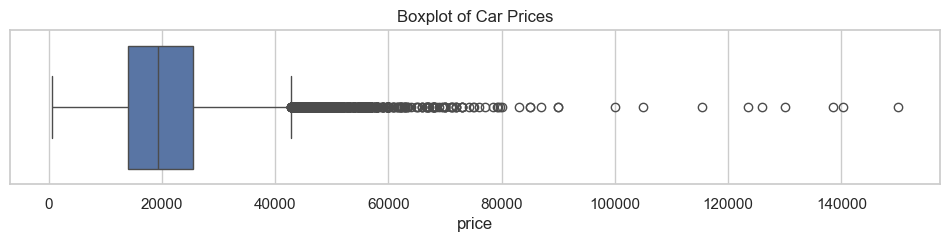

In [7]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Car Prices')
plt.show()

Display number of unique categories in each categorical column to inform encoding strategy.

In [8]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

model: 43 unique values
transmission: 3 unique values
fuelType: 4 unique values
brand: 4 unique values


Correlation matrix: Visualizing linear relationships. Useful to identify multicollinearity or features strongly tied to price.

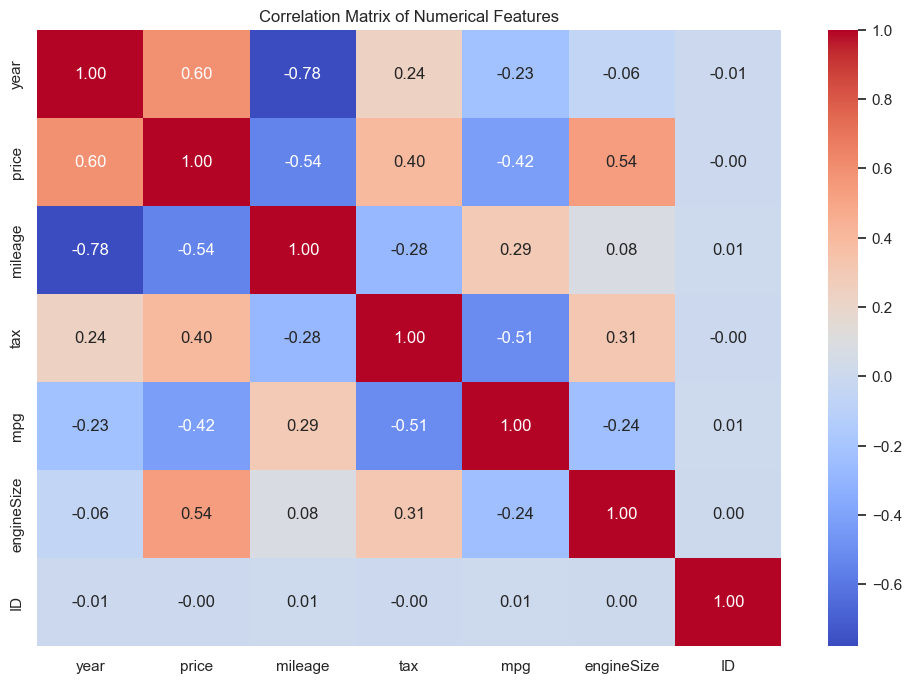

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Price distribution among top car models: How price varies across top-selling car models.

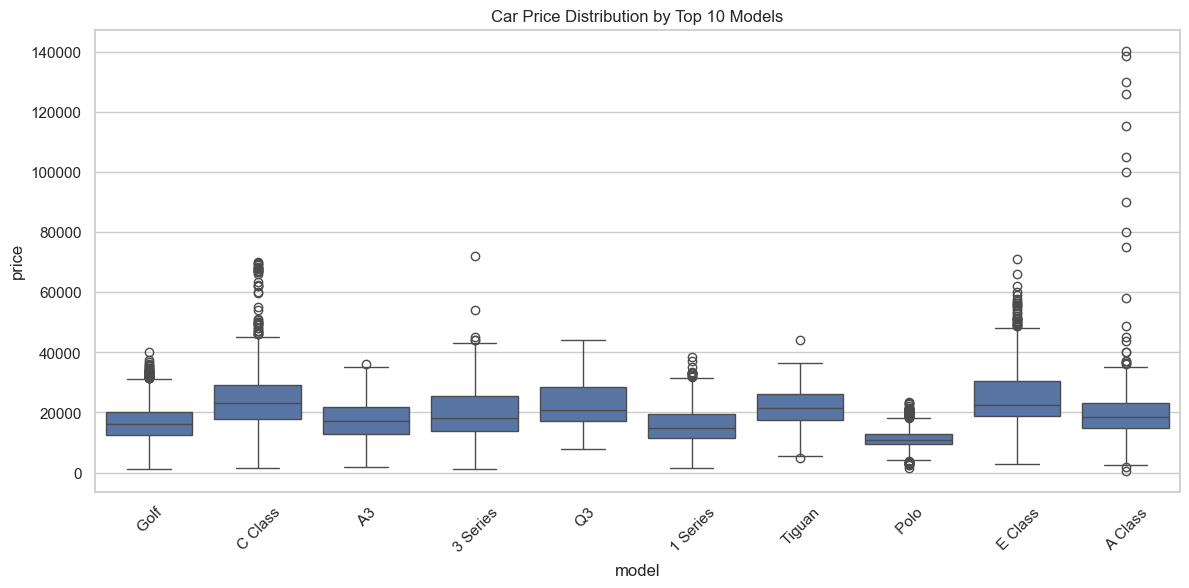

In [10]:
top_models = df['model'].value_counts().nlargest(10).index

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['model'].isin(top_models)], x='model', y='price')
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Top 10 Models")
plt.show()

Car age is derived and visualized. Likely to be a strong predictor of price.

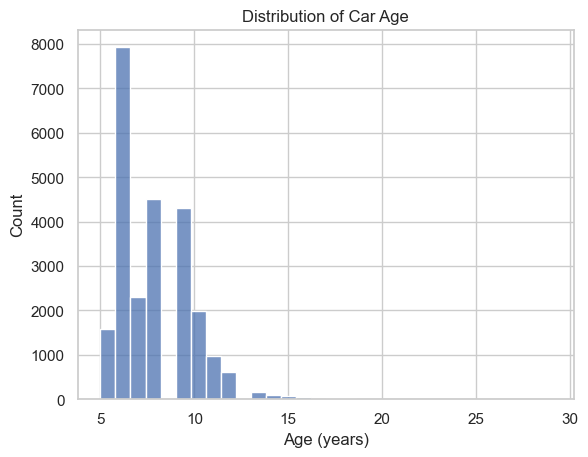

In [11]:
df['car_age'] = 2025 - df['year']
sns.histplot(df['car_age'], bins=30)
plt.title("Distribution of Car Age")
plt.xlabel("Age (years)")
plt.show()

Load the modular preprocess() function defined in a separate script.

In [12]:
import sys
sys.path.append('../Scripts')  # adjust if needed
from processing import preprocess

Apply preprocessing steps (handling nulls, encoding, etc.) and inspect result.

In [13]:
df_clean = preprocess(df)
df_clean.head()


,price,mileage,tax,mpg,engineSize,car_age,model_freq,brand_BMW,brand_Mercedes,brand_VW,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,log_price
0,11995.0,22606,30,57.6,1.4,9,709,False,False,False,True,False,False,False,True,9.392329
1,6000.0,129680,30,64.2,2.0,12,734,False,False,False,True,False,False,False,False,8.699681
2,13920.0,47576,20,67.3,2.0,9,2532,False,False,True,True,False,False,False,False,9.541154
3,10600.0,30983,30,53.3,1.4,10,2532,False,False,True,True,False,False,False,True,9.268704
4,21699.0,5229,145,43.5,1.5,6,2532,False,False,True,False,True,False,False,True,9.985068


Confirm that features are correctly transformed and dataset is model-ready.

In [14]:
print(df_clean)

         price  mileage  tax   mpg  engineSize  car_age  model_freq  \
0      11995.0    22606   30  57.6         1.4        9         709   
1       6000.0   129680   30  64.2         2.0       12         734   
2      13920.0    47576   20  67.3         2.0        9        2532   
3      10600.0    30983   30  53.3         1.4       10        2532   
4      21699.0     5229  145  43.5         1.5        6        2532   
...        ...      ...  ...   ...         ...      ...         ...   
24681  17298.0    13452  145  47.1         1.5        6        2532   
24682  14995.0    11170  145  57.7         1.6        6        2532   
24683  49990.0     6000  145  47.1         2.9        5        1045   
24684  12609.0    22991   20  72.4         1.5        9        1028   
24685  34950.0     3100  145  43.5         2.0        6         497   

       brand_BMW  brand_Mercedes  brand_VW  transmission_Manual  \
0          False           False     False                 True   
1          Fa

Validate if encoding model frequency is meaningful. Here, correlation with price is -0.244.

In [15]:
import scipy.stats as stats

# Encode original model column before dropping it (if needed)
df['model_freq'] = df['model'].map(df['model'].value_counts())

# Check correlation
corr = df[['price', 'model_freq']].corr().iloc[0,1]
print(f"Correlation between price and model frequency: {corr:.3f}")

Correlation between price and model frequency: -0.244


Generate Datasets for Each Model Type
df_log: for models sensitive to target distribution (e.g., Linear, NN)
df_tree: for tree-based models like Random Forest or XGBoost

In [16]:
df_log = preprocess(df, add_log_price=True)   # For Linear/NN
df_tree = preprocess(df, add_log_price=False) # For RF/GBM

Prepares training and validation sets for evaluation.

In [17]:
#Train/Test subdatasets splitting
from sklearn.model_selection import train_test_split

X = df_log.drop(columns=['price', 'log_price'])
y = df_log['log_price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Save clean data to disk for modeling notebooks to reuse.

In [18]:
#Saving the datasets
df_tree.to_csv('../data/clean_tree.csv', index=False)
df_log.to_csv('../data/clean_log.csv', index=False)